# Classifying Fashion-MNIST

We will be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where we can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of our network, and a better representation of datasets we will use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

First off, let's import all rrquired libraries.

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57fcc000 @  0x7fa4e50422a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch
from torch import nn
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms


#Loading data
Loading and transforming dataset through torchvision.




In [3]:
# Define a transform to normalize the data
train_transform = transforms.Compose([transforms.ToTensor(),                                      
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


#Visualize images
Here we can see 10 images of one batch.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()



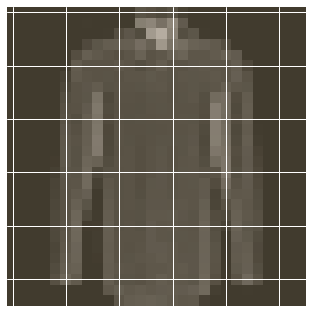

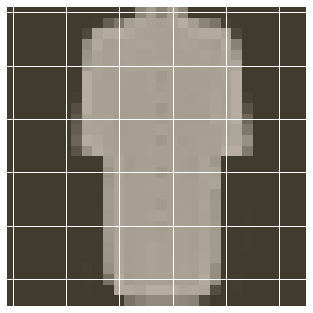

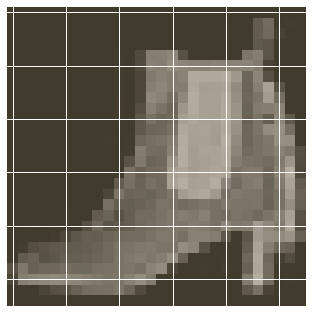

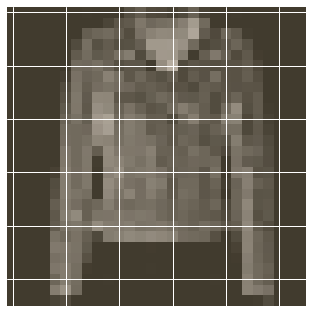

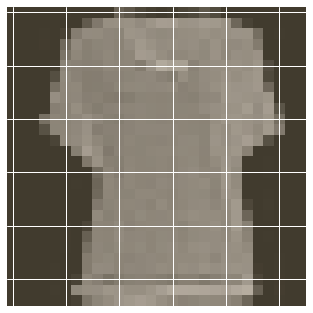

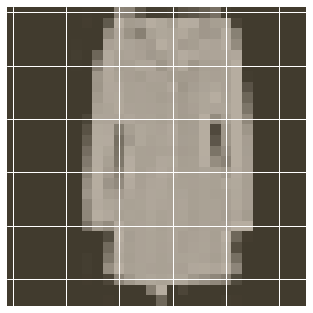

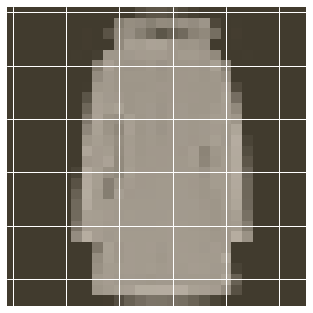

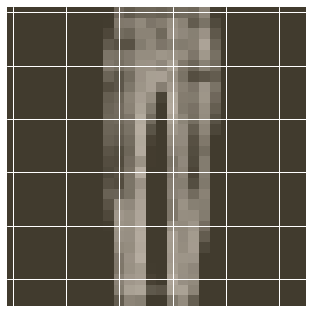

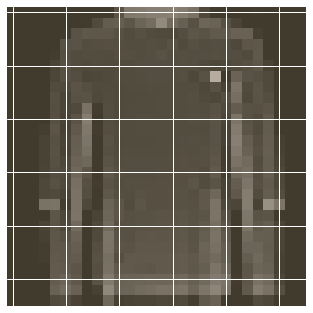

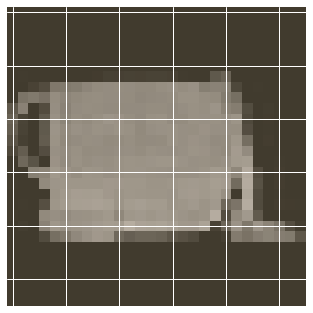

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
for i in range(10):
  imshow(images[i])

## Building the network

Here we should define our network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. 

In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Dropout(p=.25),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(p=.25),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [0]:
# Define our network architecture here
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()

In [95]:
images.shape

torch.Size([64, 784])

# Train the network

Now we should train out network. 

In [9]:
#Training the network here
epochs = 30

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images =images.view(images.shape[0],-1)
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
      print('Epoch: {} \tTraining Loss: {:.6f} '.format(
        e+1, 
        running_loss/len(trainloader),
        ))
    

Epoch: 1 	Training Loss: 0.694802 
Epoch: 2 	Training Loss: 0.602874 
Epoch: 3 	Training Loss: 0.549557 
Epoch: 4 	Training Loss: 0.518087 
Epoch: 5 	Training Loss: 0.492964 
Epoch: 6 	Training Loss: 0.475672 
Epoch: 7 	Training Loss: 0.459175 
Epoch: 8 	Training Loss: 0.446617 
Epoch: 9 	Training Loss: 0.436422 
Epoch: 10 	Training Loss: 0.428175 
Epoch: 11 	Training Loss: 0.416222 
Epoch: 12 	Training Loss: 0.409604 
Epoch: 13 	Training Loss: 0.401133 
Epoch: 14 	Training Loss: 0.394412 
Epoch: 15 	Training Loss: 0.389260 
Epoch: 16 	Training Loss: 0.383518 
Epoch: 17 	Training Loss: 0.377435 
Epoch: 18 	Training Loss: 0.373314 
Epoch: 19 	Training Loss: 0.369838 
Epoch: 20 	Training Loss: 0.365503 
Epoch: 21 	Training Loss: 0.362497 
Epoch: 22 	Training Loss: 0.359042 
Epoch: 23 	Training Loss: 0.353101 
Epoch: 24 	Training Loss: 0.349565 
Epoch: 25 	Training Loss: 0.345477 
Epoch: 26 	Training Loss: 0.342086 
Epoch: 27 	Training Loss: 0.338272 
Epoch: 28 	Training Loss: 0.334125 
E

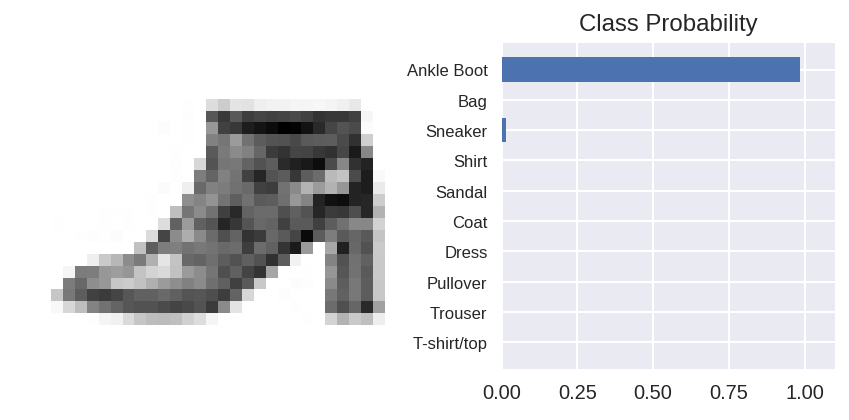

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
img =img.view(img.shape[0],-1)


# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')